<a href="https://colab.research.google.com/github/PRITHIYUMAN/singapore-resale-flat/blob/main/singapore_resale_flat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [62]:
import os
print(os.getcwd())


/content


In [63]:
# First, we observe the dataset and determine which dataset is relevant to our analysis.
#hdb_df = pd.read_csv("C:\\Users\\aasai\\OneDrive\\Desktop\\singapore resale flat\\ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")
hdb_df = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")

hdb_df.head(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0
5,2015-01,ANG MO KIO,3 ROOM,603,ANG MO KIO AVE 5,07 TO 09,67.0,New Generation,1980,64,290000.0
6,2015-01,ANG MO KIO,3 ROOM,709,ANG MO KIO AVE 8,01 TO 03,68.0,New Generation,1980,64,290000.0
7,2015-01,ANG MO KIO,3 ROOM,333,ANG MO KIO AVE 1,01 TO 03,68.0,New Generation,1981,65,293000.0
8,2015-01,ANG MO KIO,3 ROOM,109,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,62,300000.0
9,2015-01,ANG MO KIO,3 ROOM,564,ANG MO KIO AVE 3,13 TO 15,68.0,New Generation,1985,69,307500.0


In [64]:
hdb_df = hdb_df.drop(['month','street_name','flat_model','lease_commence_date', 'block'], axis=1)

In [65]:
hdb_df = hdb_df.rename(columns={'flat_type':'number_of_rooms','storey_range':'storey'})

In [66]:
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'EXECUTIVE','6 ROOM',regex=True)
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'MULTI-GENERATION','5 ROOM',regex=True)
hdb_df['number_of_rooms'] = hdb_df['number_of_rooms'].str.replace(r'ROOM','',regex=True).astype('int')

In [67]:
hdb_df['storey'] = hdb_df['storey'].str[-2:].astype('int')

In [69]:
#hdb_df['remaining_lease'] = hdb_df['remaining_lease'].str.split(' ')
import numpy as np

# Assuming hdb_df['remaining_lease'] contains a mix of floats and strings

hdb_df['remaining_lease'] = hdb_df['remaining_lease'].apply(lambda x: (float(x.split()[0]) + (float(x.split()[2])/12)) if (isinstance(x, str) and len(x.split()) == 4) else float(x) if isinstance(x, (int, float)) else np.nan)


#hdb_df['remaining_lease'] = hdb_df['remaining_lease'].apply(lambda x: (float(x[0])+(float(x[2])/12)) if (len(x)==4) else float(x[0]))
hdb_df.head()

,town,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
0,ANG MO KIO,3,9,60.0,70.0,255000.0
1,ANG MO KIO,3,3,68.0,65.0,275000.0
2,ANG MO KIO,3,3,69.0,64.0,285000.0
3,ANG MO KIO,3,3,68.0,63.0,290000.0
4,ANG MO KIO,3,9,68.0,64.0,290000.0


In [70]:
print(hdb_df['remaining_lease'].unique())


[70. 65. 64. 63. 62. 69. 60. 61. 86. 77. 80. 90. 87. 66. 58. 94. 71. 68.
 84. 73. 79. 76. 72. 82. 74. 67. 88. 81. 89. 53. 54. 55. 57. 93. 83. 85.
 92. 91. 59. 95. 52. 51. 56. 75. 96. 78. 50. 97. 49. 48.]


In [71]:
hdb_df['remaining_lease'] = hdb_df['remaining_lease'].apply(lambda x: (float(x.split()[0]) + (float(x.split()[2])/12)) if isinstance(x, str) and len(x.split()) == 4 else float(x))


In [ ]:
hdb_df['remaining_lease'] = hdb_df['remaining_lease'].str.split(' ')
hdb_df['remaining_lease'] = hdb_df['remaining_lease'].apply(lambda x: (float(x[0]) + (float(x[2])/12)) if (isinstance(x, list) and len(x) == 4) else float(x[0]))
hdb_df.head()


In [73]:
# Observe whether there is missing data or not.
hdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37153 entries, 0 to 37152
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   town             37153 non-null  object 
 1   number_of_rooms  37153 non-null  int64  
 2   storey           37153 non-null  int64  
 3   floor_area_sqm   37153 non-null  float64
 4   remaining_lease  37153 non-null  float64
 5   resale_price     37153 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 1.7+ MB


In [74]:
hdb_df.isna().sum()

town               0
number_of_rooms    0
storey             0
floor_area_sqm     0
remaining_lease    0
resale_price       0
dtype: int64

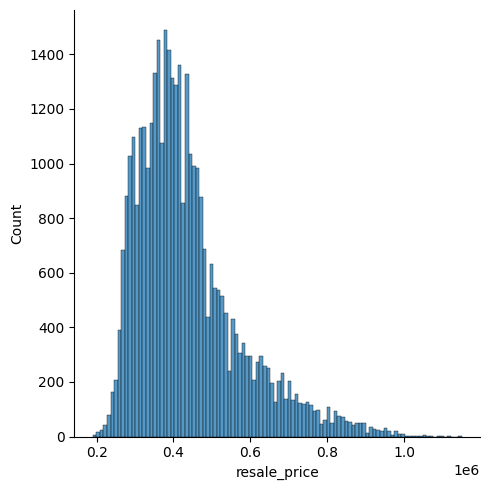

In [75]:
sns.displot(hdb_df['resale_price'])

In [76]:
hdb_df.describe()

,number_of_rooms,storey,floor_area_sqm,remaining_lease,resale_price
count,37153.000000,37153.000000,37153.000000,37153.000000,3.715300e+04
mean,4.098538,9.168842,97.020386,73.913116,4.368628e+05
std,0.917551,5.346278,24.198360,10.885456,1.358052e+05
min,1.000000,3.000000,31.000000,48.000000,1.900000e+05
25%,3.000000,6.000000,74.000000,66.000000,3.400000e+05
50%,4.000000,9.000000,96.000000,72.000000,4.080000e+05
75%,5.000000,12.000000,111.000000,83.000000,4.950000e+05
max,6.000000,51.000000,280.000000,97.000000,1.150000e+06


<Axes: >

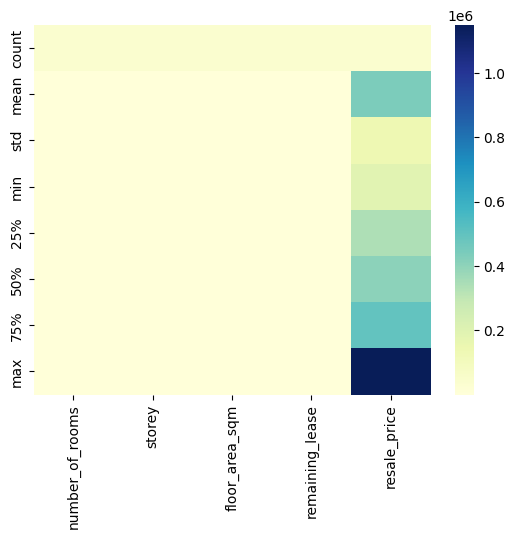

In [77]:
sns.heatmap(hdb_df.describe(), cmap="YlGnBu")

In [78]:
hdb_df['town'].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [79]:
hdb_df = hdb_df.replace(dict.fromkeys(['SEMBAWANG','SENGKANG','WOODLANDS','YISHUN'], 'NORTH'))
hdb_df = hdb_df.replace(dict.fromkeys(['BUKIT MERAH','BUKIT TIMAH','QUEENSTOWN'], 'SOUTH'))
hdb_df = hdb_df.replace(dict.fromkeys(['BEDOK','GEYLANG','HOUGANG','KALLANG/WHAMPOA','PASIR RIS','PUNGGOL','SERANGOON','TAMPINES'], 'EAST'))
hdb_df = hdb_df.replace(dict.fromkeys(['BUKIT BATOK','BUKIT PANJANG','CHOA CHU KANG','CLEMENTI','JURONG EAST','JURONG WEST'], 'WEST'))
hdb_df = hdb_df.replace(dict.fromkeys(['ANG MO KIO','CENTRAL AREA','BISHAN','MARINE PARADE','TOA PAYOH'], 'CENTRAL'))

In [80]:
hdb_df['town'].unique()

array(['CENTRAL', 'EAST', 'WEST', 'SOUTH', 'NORTH'], dtype=object)

In [81]:
hdb_df = hdb_df.rename(columns={'town':'region'})

In [82]:
X = hdb_df.iloc[:,:-1].values
y = hdb_df.iloc[:,-1].values

In [83]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [84]:
X[1,:]

array([1.0, 0.0, 0.0, 0.0, 0.0, 3, 3, 68.0, 65.0], dtype=object)

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [86]:
# Import neccessary library to evaluate the performance of each machine learning model
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error


In [87]:
from sklearn.impute import SimpleImputer

# Assuming X_train and X_test are your feature matrices
imputer = SimpleImputer(strategy='mean')  # or 'median', 'constant', etc.
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)


In [88]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(X_train_imputed, y_train)


LinearRegression()

In [89]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
mlr_ypred = mlr.predict(X_test)
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_acc

0.7252122446457833

In [90]:
from sklearn.impute import SimpleImputer

# Assuming X_train is your feature matrix
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.
X_train_imputed = imputer.fit_transform(X_train)

# Now, use X_train_imputed to train your model
mlr.fit(X_train_imputed, y_train)


LinearRegression()

In [95]:
from sklearn.linear_model import Lasso
lasso_r = Lasso(max_iter=100000)
lasso_r.fit(X_train, y_train)
lasso_ypred = lasso_r.predict(X_test)
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_acc

0.7252142289529364

In [98]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
# Let's determine the best degree for polynomial
for n in range(2,5):
    poly_reg = PolynomialFeatures(degree = n)
    X_poly = poly_reg.fit_transform(X_train)
    pr = LinearRegression()
    pr.fit(X_poly, y_train)
    poly_ypred = pr.predict(poly_reg.transform(X_test))
    poly_acc = r2_score(y_test,poly_ypred)
    poly_rmse = np.sqrt(mean_squared_error(y_test,poly_ypred))
    print(r'The accuracy of polynomial regression with degree of {} is {}'.format(n,poly_acc))
    print(r'The RMSE of polynomial regression with degree of {} is {}'.format(n,poly_rmse))

The accuracy of polynomial regression with degree of 2 is 0.8089451017556628
The RMSE of polynomial regression with degree of 2 is 59139.67128281119
The accuracy of polynomial regression with degree of 3 is 0.8109799238531649
The RMSE of polynomial regression with degree of 3 is 58823.89596276862
The accuracy of polynomial regression with degree of 4 is 0.8198632833198208
The RMSE of polynomial regression with degree of 4 is 57424.99146317987


In [99]:
from sklearn.linear_model import Ridge
ridge_r = Ridge()
ridge_r.fit(X_train, y_train)
ridge_ypred = ridge_r.predict(X_test)
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_acc

0.7252169619991193

In [100]:
from sklearn.linear_model import ElasticNet
EN_r = ElasticNet()
EN_r.fit(X_train, y_train)
EN_ypred = EN_r.predict(X_test)
EN_acc = r2_score(y_test,EN_ypred)
EN_acc

0.6126768342791404

In [101]:
from sklearn.tree import DecisionTreeRegressor
tree_r = DecisionTreeRegressor()
tree_r.fit(X_train, y_train)
tree_ypred = tree_r.predict(X_test)
tree_acc = r2_score(y_test,tree_ypred)
tree_acc

0.8379365778438496

In [102]:
from sklearn.ensemble import RandomForestRegressor
forest_r = RandomForestRegressor(n_estimators = 10)
forest_r.fit(X_train, y_train)
forest_ypred = forest_r.predict(X_test)
forest_acc = r2_score(y_test,forest_ypred)
forest_acc

0.8610799581625921

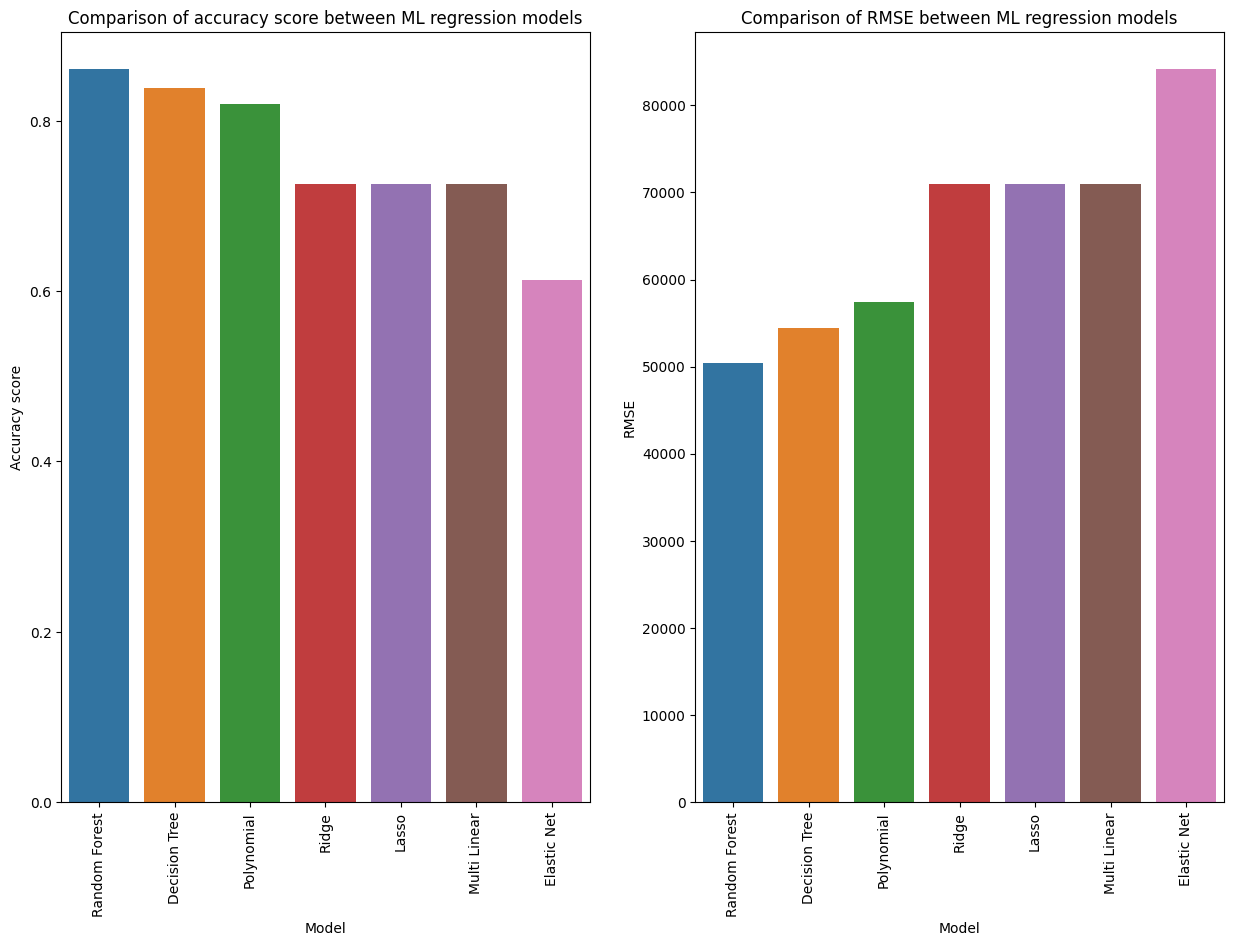

In [103]:
# Accuracy score for multi linear regression
mlr_acc = r2_score(y_test,mlr_ypred)
mlr_rmse = np.sqrt(mean_squared_error(y_test,mlr_ypred))
# Evaluation for polynomial regression has been calculated in finding the best degree
# Evaluation for ridge regression
ridge_acc = r2_score(y_test,ridge_ypred)
ridge_rmse = np.sqrt(mean_squared_error(y_test,ridge_ypred))
# Evaluation for lasso regression
lasso_acc = r2_score(y_test,lasso_ypred)
lasso_rmse = np.sqrt(mean_squared_error(y_test,lasso_ypred))
# Evaluation for elastic net regression
EN_acc = r2_score(y_test,EN_ypred)
EN_rmse = np.sqrt(mean_squared_error(y_test,EN_ypred))
# Evaluation for decision trees regression
tree_acc = r2_score(y_test,tree_ypred)
tree_rmse = np.sqrt(mean_squared_error(y_test,tree_ypred))
# Evaluation for elastic random forest regression
forest_acc = r2_score(y_test,forest_ypred)
forest_rmse = np.sqrt(mean_squared_error(y_test,forest_ypred))
# Let's put it as a list and compare it in a bar chart
model_acc_score = [mlr_acc,poly_acc, ridge_acc, lasso_acc, EN_acc, tree_acc, forest_acc]
model_rmse = [mlr_rmse, poly_rmse, ridge_rmse, lasso_rmse, EN_rmse, tree_rmse, forest_rmse]
model_list = ['Multi Linear', 'Polynomial', 'Ridge', 'Lasso', 'Elastic Net', 'Decision Tree', 'Random Forest']
model_result_df = pd.DataFrame(
    {'Model': model_list,
     'Accuracy score': model_acc_score,
     'RMSE': model_rmse
    })
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))
sns.barplot(data=model_result_df, x='Model', y='Accuracy score', ax=ax1,order=model_result_df.sort_values('Accuracy score',ascending = False).Model).set_title("Comparison of accuracy score between ML regression models")
ax1 = ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
sns.barplot(data=model_result_df, x='Model', y='RMSE', ax=ax2, order=model_result_df.sort_values('RMSE').Model).set_title("Comparison of RMSE between ML regression models")
ax2 = ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

In [104]:
# We know that after One Hot Encoding, the value of Central, East, North, South, and West is one at column 1,2,3,4, and 5, respectively (following alphabetical order).
area = ['Central','East','North','South','West']
pred_price_central = forest_r.predict([[1.0, 0.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_east = forest_r.predict([[0.0, 1.0, 0.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_north = forest_r.predict([[0.0, 0.0, 1.0, 0.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_south = forest_r.predict([[0.0, 0.0, 0.0, 1.0, 0.0, 4, 9, 95.0, 75]])[0]
pred_price_west = forest_r.predict([[0.0, 0.0, 0.0, 0.0, 1.0, 4, 9, 95.0, 75]])[0]
resale_price = [pred_price_central,pred_price_east,pred_price_north,pred_price_south,pred_price_west]
predict_df = pd.DataFrame(list(zip(area, resale_price)),
              columns=['Area','Predicted HDB price (SGD)'])
predict_df.round()

,Area,Predicted HDB price (SGD)
0,Central,534600.0
1,East,457689.0
2,North,371478.0
3,South,623950.0
4,West,371325.0
